In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [3]:
## shuffle two arrays, keeping rows in correspondence
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

def linear_svm(train, valid, c_vals, verbose=False):
    train_x = train[0]
    train_y = train[1]
    valid_x = valid[0]
    valid_y = valid[1]
    
    best_classifier = (None, 0, "l1", 0)

    res = {"l1": [], "l2": []}
    
    for penalty in ["l2"]:
        for c in c_vals:
            clf = LinearSVC(C=c, penalty=penalty)
            clf.fit(train_x, train_y)
            prediction = clf.predict(valid_x)
            accuracy = accuracy_score(valid_y, prediction)
            res[penalty].append(accuracy)
            if (accuracy > best_classifier[3]):
                best_classifier = (clf, c, penalty, accuracy)
            if verbose:
                print("Tried c = " + str(c) + " with " + penalty + " penalty")
    #plt.plot(c_vals, res["l1"])
    plt.plot(c_vals, res["l2"])
    #plt.legend(["l1 penalty", "l2 penalty"])
    plt.xlabel("C parameter")
    plt.ylabel("Accuracy")
    plt.xscale("log", basex=10)
    plt.title("Results from linear SVM classifier")
    plt.show()
    return (best_classifier[0], {"penalty": best_classifier[2], "c": best_classifier[1]}, best_classifier[3])

# The training and test sets are passed as tuples where the first index is the X and the second is the Y
def logistic_regression(train, valid, c_vals, verbose=False):
    train_x = train[0]
    train_y = train[1]
    valid_x = valid[0]
    valid_y = valid[1]
    
    best_classifier = (None, 0, "l1", 0)

    res = {"l1": [], "l2": []}
    
    for penalty in ["l1", "l2"]:
        for c in c_vals:
            clf = LogisticRegression(C=c, penalty=penalty)
            clf.fit(train_x, train_y)
            prediction = clf.predict(valid_x)
            accuracy = accuracy_score(valid_y, prediction)
            res[penalty].append(accuracy)
            if (accuracy > best_classifier[3]):
                best_classifier = (clf, c, penalty, accuracy)
            if verbose:
                print("Tried c = " + str(c) + " with " + penalty + " penalty")
    plt.plot(c_vals, res["l1"])
    plt.plot(c_vals, res["l2"])
    plt.legend(["l1 penalty", "l2 penalty"])
    plt.xlabel("C parameter")
    plt.ylabel("Accuracy")
    plt.xscale("log", basex=10)
    plt.title("Results from logistic regression classifier")
    plt.show()
    return (best_classifier[0], {"penalty": best_classifier[2], "c": best_classifier[1]}, best_classifier[3])

In [4]:
%%time
train_x = np.loadtxt("./Datasets/train_x.csv", delimiter=',')

CPU times: user 1min 31s, sys: 7.53 s, total: 1min 39s
Wall time: 1min 56s


In [5]:
%%time
train_y = np.loadtxt("./Datasets/train_y.csv", delimiter=',')

CPU times: user 129 ms, sys: 3.56 ms, total: 132 ms
Wall time: 156 ms


In [6]:
%%time
test_x = np.loadtxt("./Datasets/test_x.csv", delimiter=',')

CPU times: user 17.5 s, sys: 660 ms, total: 18.2 s
Wall time: 18.4 s


In [10]:
mini_train_x = np.loadtxt("./Datasets/mini_train_x.csv", delimiter=',')
mini_train_y = np.loadtxt("./Datasets/mini_train_y.csv", delimiter=",")

Tried c = 1e-06 with l1 penalty
Tried c = 4.28133239872e-06 with l1 penalty
Tried c = 1.83298071083e-05 with l1 penalty
Tried c = 7.84759970351e-05 with l1 penalty
Tried c = 0.000335981828628 with l1 penalty
Tried c = 0.00143844988829 with l1 penalty
Tried c = 0.00615848211066 with l1 penalty
Tried c = 0.0263665089873 with l1 penalty
Tried c = 0.112883789168 with l1 penalty
Tried c = 0.483293023857 with l1 penalty
Tried c = 2.06913808111 with l1 penalty
Tried c = 8.8586679041 with l1 penalty
Tried c = 37.9269019073 with l1 penalty
Tried c = 162.377673919 with l1 penalty
Tried c = 695.192796178 with l1 penalty
Tried c = 2976.35144163 with l1 penalty
Tried c = 12742.749857 with l1 penalty
Tried c = 54555.9478117 with l1 penalty
Tried c = 233572.146909 with l1 penalty
Tried c = 1000000.0 with l1 penalty
Tried c = 1e-06 with l2 penalty
Tried c = 4.28133239872e-06 with l2 penalty
Tried c = 1.83298071083e-05 with l2 penalty
Tried c = 7.84759970351e-05 with l2 penalty
Tried c = 0.000335981828

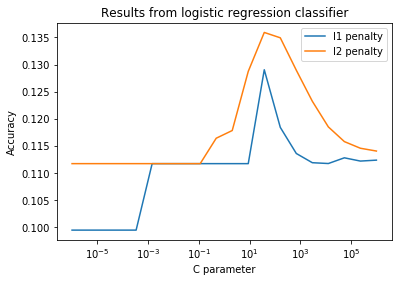

Tried c = 1e-06 with l2 penalty
Tried c = 4.28133239872e-06 with l2 penalty
Tried c = 1.83298071083e-05 with l2 penalty
Tried c = 7.84759970351e-05 with l2 penalty
Tried c = 0.000335981828628 with l2 penalty
Tried c = 0.00143844988829 with l2 penalty
Tried c = 0.00615848211066 with l2 penalty
Tried c = 0.0263665089873 with l2 penalty
Tried c = 0.112883789168 with l2 penalty
Tried c = 0.483293023857 with l2 penalty
Tried c = 2.06913808111 with l2 penalty
Tried c = 8.8586679041 with l2 penalty
Tried c = 37.9269019073 with l2 penalty
Tried c = 162.377673919 with l2 penalty
Tried c = 695.192796178 with l2 penalty
Tried c = 2976.35144163 with l2 penalty
Tried c = 12742.749857 with l2 penalty
Tried c = 54555.9478117 with l2 penalty
Tried c = 233572.146909 with l2 penalty
Tried c = 1000000.0 with l2 penalty


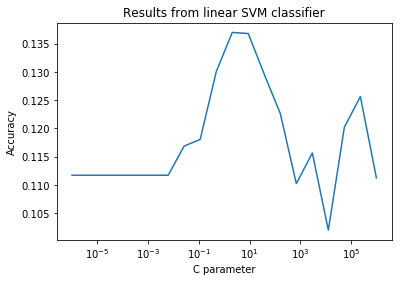

CPU times: user 45min 16s, sys: 272 ms, total: 45min 16s
Wall time: 45min 16s


In [10]:
%%time

train_avg = np.mean(train_x, axis=0)
for i in range(len(train_x)):
    train_x[i] -= train_avg
for i in range(len(test_x)):
    test_x[i] -= train_avg
train_x /= 255.0
test_x /= 255.0

X_train, y_train = unison_shuffled_copies(train_x, train_y)

HYP_TUNE_SIZE = 5000
train = (X_train[:int(HYP_TUNE_SIZE * 0.7)], y_train[:int(HYP_TUNE_SIZE*0.7)])
valid = (X_train[int(HYP_TUNE_SIZE*0.7):], y_train[int(HYP_TUNE_SIZE*0.7):])
results_logistic = logistic_regression(train, valid, np.logspace(-6,6,20), verbose=True)
results_svm = linear_svm(train, valid, np.logspace(-6,6,20), verbose = True)

## Pytorch

In [36]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.nn.init as init

import torchvision
import torchvision.transforms

from sklearn.model_selection import train_test_split

import time
from __future__ import print_function


In [45]:
# Convert the dataset into tensors
x_train, y_train = unison_shuffled_copies(train_x, train_y)

x_train_dev, x_test_dev, y_train_dev, y_test_dev = train_test_split(x_train, y_train, test_size=0.1, train_size=0.3, random_state=42)

ttrain_x = torch.from_numpy(x_train_dev) # currently has x_train_dev as dataset for dev purposes
ttrain_y = torch.from_numpy(y_train_dev)
ttest_x = torch.from_numpy(test_x)

In [38]:
class NeuralNet(nn.Module):
    
    # Can choose to take dimensions in constructor, but for now just keeping them variable since unsure about
    # how many variables to have in the constructor based on design
    def __init__(self):
        super(NeuralNet, self).__init__() # init recursively
        self.conv = nn.Sequential(
            
            ## THIS IS INSPIRED BY
            ## https://github.com/mila-udem/welcome_tutorials/blob/master/pytorch/4.%20Image%20Classification%20with%20Convnets%20and%20ResNets.ipynb
            
            # Layer 1
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=(3, 3), padding=1),
            # nn.Dropout(p=0.5), # Random p% of nodes are cancelled - this is for regularization
            nn.ReLU(),
            
            # Layer 2
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3), padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=2),
            
            # Layer 3
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), padding=1),
            nn.ReLU(),
            
            # Layer 4
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3), padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=2),
        )
         # Logistic Regression
        self.clf = nn.Linear(128, 10)
    
    def forward(self, x):
        return self.clf(self.conv(x).squeeze())

In [86]:
train = []
for i in range(len(x_train_dev)):
    train.append((x_train_dev[i],y_train_dev[i]))

trainloader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True, num_workers=2)
# testloader = torch.utils.data.DataLoader(ttrain_y, batch_size=64, shuffle=True, num_workers=2)
    
clf = NeuralNet()
if cuda_available:
    clf = clf.cuda()

optimizer = torch.optim.Adam(clf.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()


cuda_available = torch.cuda.is_available()

In [85]:
for epoch in range(50):
    losses = []
    # Train
    for batch_idx, data in enumerate(trainloader):
        inputs, labels = data
        if cuda_available:
            inputs, labels = inputs.cuda(), labels.cuda()

        optimizer.zero_grad()
        inputs, labels = Variable(inputs), Variable(labels)
        outputs = clf(inputs)
        
        # Compute the loss
        loss = criterion(outputs, targets)
        
        # Reset gradients to zero, perform a backward pass, and update the weights.
        loss.backward()
        optimizer.step()
        losses.append(loss.data[0])

    print('Epoch : %d Loss : %.3f ' % (epoch, np.mean(losses)))
    
    # Evaluate
    clf.eval()
    total = 0
    correct = 0
    for batch_idx, (inputs, targets) in enumerate(testloader):
        if cuda_available:
            inputs, targets = inputs.cuda(), targets.cuda()

        inputs, targets = Variable(inputs, volatile=True), Variable(targets, volatile=True)
        outputs = clf(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += predicted.eq(targets.data).cpu().sum()

    print('Epoch : %d Test Acc : %.3f' % (epoch, 100.*correct/total))
    print('--------------------------------------------------------------')
    clf.train()

ValueError: Expected 4D tensor as input, got 2D tensor instead.